# Machine Learning Final Project

Submitted By:

Roey Brown: 208993006

Matan Vidal: 206508426

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
#Load the Dataset:
os.chdir("C:\\Users\\user\\Desktop\\לימודים\\שנה ד'\\למידת מכונה")      
df = pd.read_excel("data_cleaned.xlsx")
data = df.copy()

## EDA

In [5]:
# Creating a dictionary to map Hebrew column names to English
column_mapping = {
    'מס"ד': 'ID',
    'שם מפעל': 'Factory Name',
    'מחוז': 'District',
    'רשות מקומית': 'Municipality',
    'ישוב': 'Settlement',
    'נ"צ X': 'Coordinate X',
    'נ"צ Y': 'Coordinate Y',
    'ענף פעילות': 'Activity Sector',
    'תחום פעילות': 'Activity Field',
    'סוג פעילות': 'Activity Type',
    'סיווג למ"ס': 'Classification Code',
    'סוג פליטה/הזרמה': 'Emission Type',
    'מזהם בפליטה/הזרמה': 'Emission Pollutant',
    'קוד מזהם': 'Pollutant Code',
    'קבוצת מזהמים': 'Pollutant Group',
    'כמות פליטה/הזרמה (ק"ג)': 'Emission Amount (kg)',
    'כמות העברת פסולת לא מסוכנת לטיפול (טון)': 'Non-Hazardous Waste for Treatment (tons)',
    'כמות העברת פסולת לא מסוכנת לסילוק (טון)': 'Non-Hazardous Waste for Disposal (tons)',
    'כמות העברת פסולת מסוכנת לטיפול (טון)': 'Hazardous Waste for Treatment (tons)',
    'כמות העברת פסולת מסוכנת לסילוק (טון)': 'Hazardous Waste for Disposal (tons)'
}
# Renaming the columns in the DataFrame
data = data.rename(columns=column_mapping)

# Displaying the first few rows to verify the column renaming
data.head()

,ID,Factory Name,District,Municipality,Settlement,Coordinate X,Coordinate Y,Activity Sector,Activity Field,Activity Type,Classification Code,Emission Type,Emission Pollutant,Pollutant Code,Pollutant Group,Emission Amount (kg),Non-Hazardous Waste for Treatment (tons),Non-Hazardous Waste for Disposal (tons),Hazardous Waste for Treatment (tons),Hazardous Waste for Disposal (tons)
0,37,"א.ב. מחזור והובלות בע""מ",דרום,אשדוד,אשדוד,169928,637818,פסולת ושפכים,תחנת מעבר לפסולת,54 - מיתקן נייח וקבוע שבו נעשת העברה של פסולת ...,3821 טיפול בחומרי פסולת שאינם מסוכנים וסילוקם,אוויר,ניטרוס אוקסיד - Nitrous oxide (N2O),77,גזי חממה,0.5,568910.0,5145.0,0.0,0.0
1,38,"א.ב. מחזור והובלות בע""מ",דרום,אשדוד,אשדוד,169928,637818,פסולת ושפכים,תחנת מעבר לפסולת,54 - מיתקן נייח וקבוע שבו נעשת העברה של פסולת ...,3821 טיפול בחומרי פסולת שאינם מסוכנים וסילוקם,אוויר,בנזן - Benzene,11,חומרים אורגניים אחרים,0.5,568910.0,5145.0,0.0,0.0
2,39,"א.ב. מחזור והובלות בע""מ",דרום,אשדוד,אשדוד,169928,637818,פסולת ושפכים,תחנת מעבר לפסולת,54 - מיתקן נייח וקבוע שבו נעשת העברה של פסולת ...,3821 טיפול בחומרי פסולת שאינם מסוכנים וסילוקם,אוויר,פחמן חד-חמצני - Carbon monoxide (CO),20,גזים אחרים,0.5,568910.0,5145.0,0.0,0.0
3,40,"א.ב. מחזור והובלות בע""מ",דרום,אשדוד,אשדוד,169928,637818,פסולת ושפכים,תחנת מעבר לפסולת,54 - מיתקן נייח וקבוע שבו נעשת העברה של פסולת ...,3821 טיפול בחומרי פסולת שאינם מסוכנים וסילוקם,אוויר,פחמן דו-חמצני - Carbon dioxide (CO2),19,גזי חממה,0.5,568910.0,5145.0,0.0,0.0
4,41,"א.ב. מחזור והובלות בע""מ",דרום,אשדוד,אשדוד,169928,637818,פסולת ושפכים,תחנת מעבר לפסולת,54 - מיתקן נייח וקבוע שבו נעשת העברה של פסולת ...,3821 טיפול בחומרי פסולת שאינם מסוכנים וסילוקם,אוויר,תרכובות אורגניות נדיפות למעט מתאן - Non – meth...,78,חומרים אורגניים אחרים,1543,568910.0,5145.0,0.0,0.0


In [6]:
column_types = data.dtypes
print(column_types)

ID                                            int64
Factory Name                                 object
District                                     object
Municipality                                 object
Settlement                                   object
Coordinate X                                  int64
Coordinate Y                                  int64
Activity Sector                              object
Activity Field                               object
Activity Type                                object
Classification Code                          object
Emission Type                                object
Emission Pollutant                           object
Pollutant Code                                int64
Pollutant Group                              object
Emission Amount (kg)                         object
Non-Hazardous Waste for Treatment (tons)    float64
Non-Hazardous Waste for Disposal (tons)     float64
Hazardous Waste for Treatment (tons)        float64
Hazardous Wa

In [7]:
# Initial Cleaning: Convert 'Emission Amount (kg)' to numeric
data['Emission Amount (kg)'] = pd.to_numeric(data['Emission Amount (kg)'], errors='coerce')
data_cleaned = data.dropna(subset=['Emission Amount (kg)'])

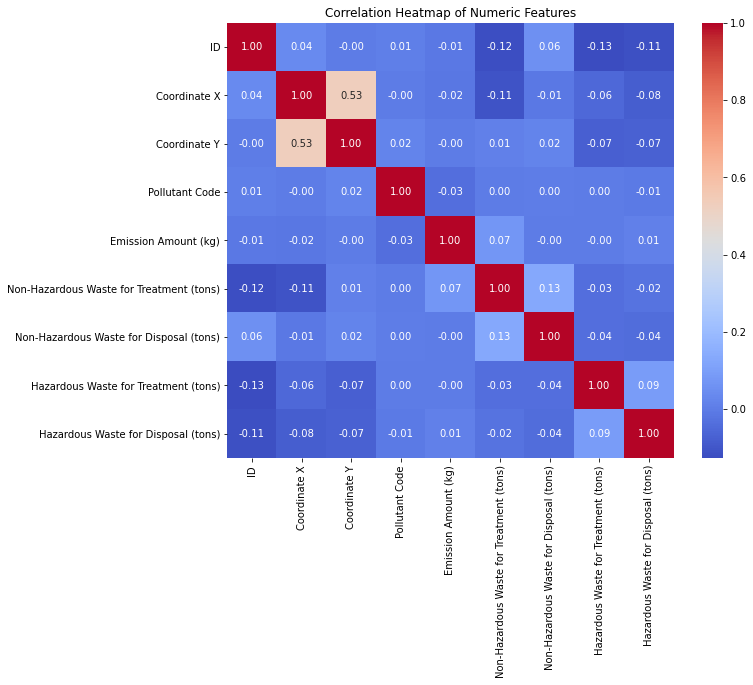

In [8]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Most correlations are weak (close to 0), indicating that the variables are mostly independent. This is important for ensuring diverse contributions in predictive models.


# Now we will present the numerical column graphs to understand outliers.

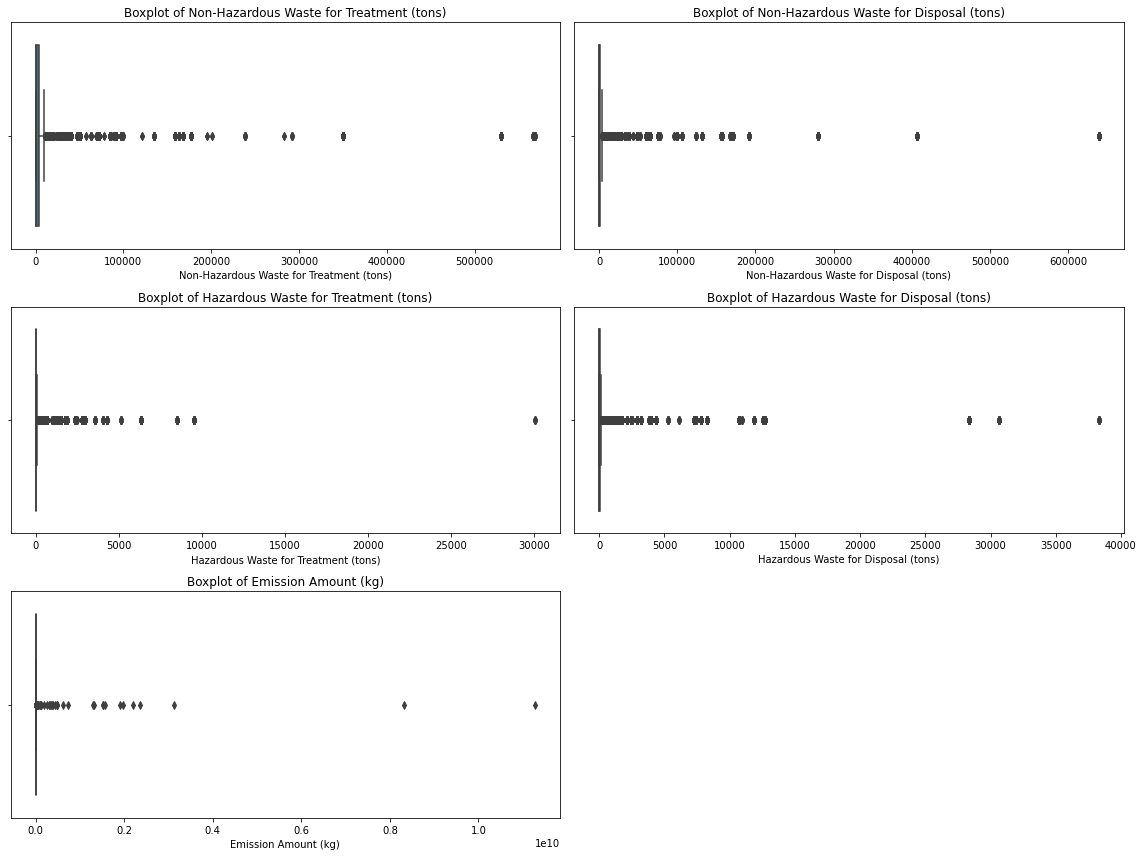

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = [
    'Non-Hazardous Waste for Treatment (tons)',
    'Non-Hazardous Waste for Disposal (tons)',
    'Hazardous Waste for Treatment (tons)',
    'Hazardous Waste for Disposal (tons)',
    'Emission Amount (kg)'  
]

plt.figure(figsize=(16, 12))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i) 
    
    # Boxplot 
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# there are outliers in each column, so we will remove them by identifying 4 standard deviations from the mean.

# Now we will present graphs to understand the distribution of the column data.

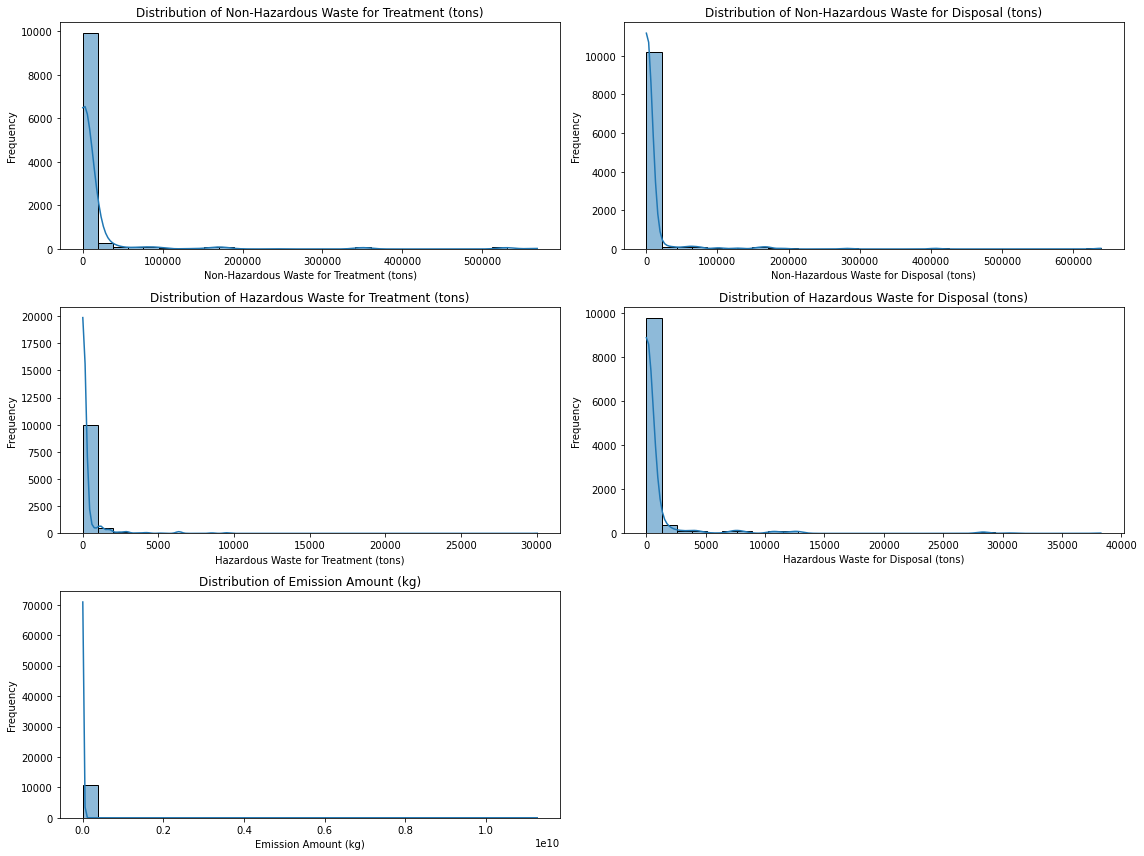

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_check = [
    'Non-Hazardous Waste for Treatment (tons)',
    'Non-Hazardous Waste for Disposal (tons)',
    'Hazardous Waste for Treatment (tons)',
    'Hazardous Waste for Disposal (tons)',
    'Emission Amount (kg)' 
]

# Graphs
plt.figure(figsize=(16, 12))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i) 
    
    # Create a histogram with density lines
    sns.histplot(data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## We can see from the graphs that this is a positive asymmetric distribution, meaning there is a high concentration of low values ​​with a few very high outliers.

# Now we will remove outliers by 4 standard deviations.

In [11]:
# Function to identify outliers using standard deviation
def find_outliers_std(df, columns, threshold=4):
    outliers = {}
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        # Filtering outliers
        outliers[col] = df[(df[col] < mean - threshold * std) | (df[col] > mean + threshold * std)]
    
    return outliers

columns_to_check = [
    'Non-Hazardous Waste for Treatment (tons)',
    'Non-Hazardous Waste for Disposal (tons)',
    'Hazardous Waste for Treatment (tons)',
    'Hazardous Waste for Disposal (tons)',
    'Emission Amount (kg)' 
]

# Finding the outliers in the columns 
outliers_std = find_outliers_std(data_cleaned, columns_to_check)

# Removing the outlier from the data
data_cleaned_no_outliers = data_cleaned.copy()

for col, outlier_df in outliers_std.items():
    data_cleaned_no_outliers = data_cleaned_no_outliers[~data_cleaned_no_outliers[col].isin(outlier_df[col])]

# Displaying results
for col, outlier_df in outliers_std.items():
    num_outliers = len(outlier_df)  # Number of outliers
    original_count = len(data_cleaned)  # Original amount of rows
    new_count = len(data_cleaned_no_outliers)  # Number of rows after outliers remove
    
    # Calculating the percentage of outliers removed
    percentage_removed = ((original_count - new_count) / original_count) * 100
    
    print(f"Number of outliers in {col}: {num_outliers}")
    print(f"Percentage of rows removed for {col}: {percentage_removed:.2f}%")
    print(f"Original range for {col}: {data_cleaned[col].min()} to {data_cleaned[col].max()}")
    print(f"New range for {col} after removing outliers: {data_cleaned_no_outliers[col].min()} to {data_cleaned_no_outliers[col].max()}")
    print("\n")


Number of outliers in Non-Hazardous Waste for Treatment (tons): 210
Percentage of rows removed for Non-Hazardous Waste for Treatment (tons): 4.94%
Original range for Non-Hazardous Waste for Treatment (tons): 0.0 to 568910.0
New range for Non-Hazardous Waste for Treatment (tons) after removing outliers: 0.0 to 292000.0


Number of outliers in Non-Hazardous Waste for Disposal (tons): 83
Percentage of rows removed for Non-Hazardous Waste for Disposal (tons): 4.94%
Original range for Non-Hazardous Waste for Disposal (tons): 0.0 to 639206.0
New range for Non-Hazardous Waste for Disposal (tons) after removing outliers: 0.0 to 192150.86


Number of outliers in Hazardous Waste for Treatment (tons): 133
Percentage of rows removed for Hazardous Waste for Treatment (tons): 4.94%
Original range for Hazardous Waste for Treatment (tons): 0.0 to 30044.73
New range for Hazardous Waste for Treatment (tons) after removing outliers: 0.0 to 5131.25


Number of outliers in Hazardous Waste for Disposal (ton

In [12]:
data_cleaned_no_outliers.shape

(10369, 20)

In [13]:
# Column names check
column_names = data_cleaned_no_outliers.columns
print(column_names)

Index(['ID', 'Factory Name', 'District', 'Municipality', 'Settlement',
       'Coordinate X', 'Coordinate Y', 'Activity Sector', 'Activity Field',
       'Activity Type', 'Classification Code', 'Emission Type',
       'Emission Pollutant', 'Pollutant Code', 'Pollutant Group',
       'Emission Amount (kg)', 'Non-Hazardous Waste for Treatment (tons)',
       'Non-Hazardous Waste for Disposal (tons)',
       'Hazardous Waste for Treatment (tons)',
       'Hazardous Waste for Disposal (tons)'],
      dtype='object')


# Now we will continue preparing our data, we will prepare columns for hazardous and non-hazardous waste.

In [14]:
# columns for hazardous and non-hazardous waste.
data_cleaned_no_outliers['Non-Hazardous Waste (tons)'] = data_cleaned_no_outliers['Non-Hazardous Waste for Treatment (tons)'] + data_cleaned_no_outliers['Non-Hazardous Waste for Disposal (tons)']
data_cleaned_no_outliers['Hazardous Waste (tons)'] = data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] + data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)']

print(data_cleaned_no_outliers[['Non-Hazardous Waste (tons)', 'Hazardous Waste (tons)']].head())

    Non-Hazardous Waste (tons)  Hazardous Waste (tons)
15                     2427.88                     0.0
16                     2427.88                     0.0
17                     2427.88                     0.0
18                     2427.88                     0.0
19                     2427.88                     0.0


# Now we will analyze the amount of hazardous waste by district.

In [15]:
# Summary of the amount of hazardous waste per district
hazardous_waste_by_district = data_cleaned_no_outliers.groupby('District')[['Hazardous Waste (tons)', 'Hazardous Waste for Treatment (tons)', 'Hazardous Waste for Disposal (tons)']].sum()

print(hazardous_waste_by_district.head())

# Calculation of the percentage of hazardous waste sent for treatment and disposal
hazardous_waste_by_district['Treatment Percentage'] = hazardous_waste_by_district['Hazardous Waste for Treatment (tons)'] / hazardous_waste_by_district['Hazardous Waste (tons)'] * 100
hazardous_waste_by_district['Disposal Percentage'] = hazardous_waste_by_district['Hazardous Waste for Disposal (tons)'] / hazardous_waste_by_district['Hazardous Waste (tons)'] * 100

print(hazardous_waste_by_district[['Treatment Percentage', 'Disposal Percentage']].head())

          Hazardous Waste (tons)  Hazardous Waste for Treatment (tons)  \
District                                                                 
דרום                5.605723e+06                          980059.69240   
חיפה                7.531983e+05                          354056.48000   
ירושלים             1.696940e+03                            1548.77000   
מרכז                2.244815e+05                           50991.08580   
צפון                6.237959e+05                          257584.35838   

          Hazardous Waste for Disposal (tons)  
District                                       
דרום                             4.625663e+06  
חיפה                             3.991418e+05  
ירושלים                          1.481700e+02  
מרכז                             1.734904e+05  
צפון                             3.662116e+05  
          Treatment Percentage  Disposal Percentage
District                                           
דרום                 17.483200           

<Figure size 1008x576 with 0 Axes>

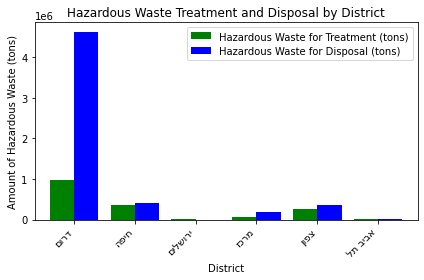

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to reverse Hebrew words
def reverse_string(string):
    return ' '.join([word[::-1] for word in string.split()])

# Summary of the amount of hazardous waste per district
hazardous_waste_by_district = data_cleaned_no_outliers.groupby('District')[['Hazardous Waste for Treatment (tons)', 'Hazardous Waste for Disposal (tons)']].sum()

# Transforming every word in every province
reversed_districts = [reverse_string(district) for district in hazardous_waste_by_district.index]

# Create a barplot graph for the amount of hazardous waste for treatment and disposal by district
plt.figure(figsize=(14, 8))

#barplot
hazardous_waste_by_district.plot(kind='bar', stacked=False, color=['green', 'blue'], width=0.8)
plt.xticks(ticks=range(len(hazardous_waste_by_district)), labels=reversed_districts, rotation=45, ha="right")

# Titles 
plt.title('Hazardous Waste Treatment and Disposal by District')
plt.xlabel('District')
plt.ylabel('Amount of Hazardous Waste (tons)')

# Graphs
plt.tight_layout()
plt.show()

# The graph shows that the Southern District emits a significantly large amount of hazardous waste.

# We will present the data on the percentage of districts treating and disposing of hazardous materials.

<Figure size 1008x576 with 0 Axes>

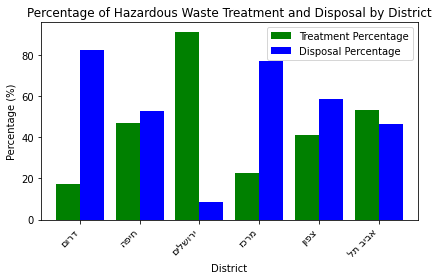

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of the amount of hazardous waste per district
hazardous_waste_by_district = data_cleaned_no_outliers.groupby('District')[['Hazardous Waste (tons)','Hazardous Waste for Treatment (tons)', 'Hazardous Waste for Disposal (tons)']].sum()

# Calculation of the percentage of treated waste and the waste eliminated
hazardous_waste_by_district['Treatment Percentage'] = (hazardous_waste_by_district['Hazardous Waste for Treatment (tons)'] / hazardous_waste_by_district['Hazardous Waste (tons)']) * 100
hazardous_waste_by_district['Disposal Percentage'] = (hazardous_waste_by_district['Hazardous Waste for Disposal (tons)'] / hazardous_waste_by_district['Hazardous Waste (tons)']) * 100

# Transforming every word in every province
def reverse_string(string):
    return ' '.join([word[::-1] for word in string.split()])

reversed_districts = [reverse_string(district) for district in hazardous_waste_by_district.index]

# Barplot
plt.figure(figsize=(14, 8))

# Barplot for the percentage of waste treated and the percentage of waste eliminated
ax = hazardous_waste_by_district[['Treatment Percentage', 'Disposal Percentage']].plot(kind='bar', stacked=False, color=['green', 'blue'], width=0.8)

plt.xticks(ticks=range(len(hazardous_waste_by_district)), labels=reversed_districts, rotation=45, ha="right")

# Titles
plt.title('Percentage of Hazardous Waste Treatment and Disposal by District')
plt.xlabel('District')
plt.ylabel('Percentage (%)')

# Graphs
plt.tight_layout()
plt.show()

# The graph shows the percentage of hazardous materials handled.
# The Jerusalem District accounts for more than 90% of hazardous materials handled.

# We will now examine data on the handling of hazardous waste by factory.

In [16]:
# Calculation of the percentage of waste treated and waste disposed of for each factory
data_cleaned_no_outliers['Treatment Percentage'] = (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] / 
                                                     (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] + 
                                                      data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'])) * 100
data_cleaned_no_outliers['Disposal Percentage'] = (data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'] / 
                                                    (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] + 
                                                     data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'])) * 100

# Summary of information by factory name
factory_percentage = data_cleaned_no_outliers.groupby('Factory Name')[['Treatment Percentage', 'Disposal Percentage']].mean()

# Sorting of factories by percentage of waste treated and disposed of
top_10_treatment = factory_percentage.sort_values(by='Treatment Percentage', ascending=False).head(30)
top_10_disposal = factory_percentage.sort_values(by='Disposal Percentage', ascending=False).head(30)

# Showing the 10 factories that handle the most
print("Top 10 Factories by Treatment Percentage:")
print(top_10_treatment[['Treatment Percentage']])

# Showing the 10 factories that clear the most
print("\nTop 10 Factories by Disposal Percentage:")
print(top_10_disposal[['Disposal Percentage']])


## Here we see the 30 corporations that handle/dispose of hazardous wastes.
#There are factories that handle 100% and there are those that dispose of 100% of the hazardous waste they emit and not all of the waste they emit.

Top 10 Factories by Treatment Percentage:
                                                    Treatment Percentage
Factory Name                                                            
מלט הר טוב בע"מ                                                    100.0
סופרסולד - מפעל מיחזור מתכת                                        100.0
בקר תנובה שותפות מוגבלת - משחטה                                    100.0
תדביק בע"מ                                                         100.0
סייקלין בע"מ                                                       100.0
שפיר תעשיות בע"מ - מחצבת ורד                                       100.0
שפיר תעשיות בע"מ - מחצבות עציונה עמק האלה                          100.0
גן שמואל מזון בע"מ                                                 100.0
גת גבעת חיים אגודה שיתופית לשימורי תוצרת חקלאית בע                 100.0
חוד אסף פלדה בע"מ                                                  100.0
חד אסף מתכות בע"מ                                                  100.0
רותם אמפר

# calculate treated waste and disposed waste according to pollutant group

In [17]:
# Calculation of the percentage of treated waste and removed waste for each pollutant group
data_cleaned_no_outliers['Treatment Percentage'] = (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] / 
                                                     (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] + 
                                                      data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'])) * 100
data_cleaned_no_outliers['Disposal Percentage'] = (data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'] / 
                                                    (data_cleaned_no_outliers['Hazardous Waste for Treatment (tons)'] + 
                                                     data_cleaned_no_outliers['Hazardous Waste for Disposal (tons)'])) * 100

# Summary of information by pollutant group
pollutant_group_percentage = data_cleaned_no_outliers.groupby('Pollutant Group')[['Treatment Percentage', 'Disposal Percentage', 'Hazardous Waste for Treatment (tons)', 'Hazardous Waste for Disposal (tons)']].mean()

# Sorting pollutant groups by the percentage of waste treated and disposed of
top_10_pollutants_treatment = pollutant_group_percentage.sort_values(by='Treatment Percentage', ascending=False).head(10)
top_10_pollutants_disposal = pollutant_group_percentage.sort_values(by='Disposal Percentage', ascending=False).head(10)

# Showing the 10 most treated pollutant groups
print("Top 10 Pollutant Groups by Treatment Percentage:")
print(top_10_pollutants_treatment[['Treatment Percentage', 'Hazardous Waste for Treatment (tons)']])

# Showing the 10 groups of pollutants that are removed the most
print("\nTop 10 Pollutant Groups by Disposal Percentage:")
print(top_10_pollutants_disposal[['Disposal Percentage', 'Hazardous Waste for Disposal (tons)']])

# Here we see that greenhouse gases are treated the most and pesticides are eliminated the most.

Top 10 Pollutant Groups by Treatment Percentage:
                         Treatment Percentage  \
Pollutant Group                                 
גזי חממה                            50.359007   
גזים אחרים                          48.941544   
חומרים אנאורגניים                   47.940427   
חומרים אורגניים אחרים               46.074065   
מתכות כבדות                         43.284670   
חומרים אורגניים מוכלרים             33.065194   
חומרי הדברה                         27.505455   

                         Hazardous Waste for Treatment (tons)  
Pollutant Group                                                
גזי חממה                                           173.479390  
גזים אחרים                                         148.985547  
חומרים אנאורגניים                                  129.642808  
חומרים אורגניים אחרים                              167.321844  
מתכות כבדות                                        201.725028  
חומרים אורגניים מוכלרים                            130.328112

# Supervised Models

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create copies to avoid loss the original data
data_copy = data_cleaned_no_outliers.copy()

# Filter rows that have no data (every value is 0)
data_copy = data_copy[(data_copy['Non-Hazardous Waste for Treatment (tons)'] > 0) | 
                       (data_copy['Non-Hazardous Waste for Disposal (tons)'] > 0) | 
                       (data_copy['Hazardous Waste for Treatment (tons)'] > 0) | 
                       (data_copy['Hazardous Waste for Disposal (tons)'] > 0)]

# Calculation of the amount of waste treated and disposed of
data_copy['Total_Treatment'] = data_copy['Non-Hazardous Waste for Treatment (tons)'] + data_copy['Hazardous Waste for Treatment (tons)']
data_copy['Total_Disposal'] = data_copy['Non-Hazardous Waste for Disposal (tons)'] + data_copy['Hazardous Waste for Disposal (tons)']

# Create three columns based on the conditions:
def classify_environmental_impact(row):
    if row['Total_Treatment'] > row['Total_Disposal']:
        return 'High'
    elif row['Total_Treatment'] > 0 and row['Total_Treatment'] < row['Total_Disposal']:
        return 'Medium'
    elif row['Total_Treatment'] == 0 and row['Total_Disposal'] > 0:
        return 'Low'
    return 'Low'  # אם אין טיפול או סילוק, נמוך

# Creating the new columns
data_copy['Environmental Impact'] = data_copy.apply(classify_environmental_impact, axis=1)

#Showing some of the data
print(data_copy[['Total_Treatment', 'Total_Disposal', 'Environmental Impact']].head())

# We create a model that will predict hazardous emission quantities by area according to classification into categories of hazard levels.

    Total_Treatment  Total_Disposal Environmental Impact
15              0.0         2427.88                  Low
16              0.0         2427.88                  Low
17              0.0         2427.88                  Low
18              0.0         2427.88                  Low
19              0.0         2427.88                  Low


In [21]:
from xgboost import XGBClassifier

# Convert categorical variables to numeric
le = LabelEncoder()
data_copy['Environmental Impact'] = le.fit_transform(data_copy['Environmental Impact'])


X = data_copy[['Municipality', 'Emission Pollutant']]  
y = data_copy['Environmental Impact'] # predicted value

le = LabelEncoder()
X['Municipality'] = le.fit_transform(X['Municipality'])
X['Emission Pollutant'] = le.fit_transform(X['Emission Pollutant'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

results = {}

# Model training and evaluation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    # Calculation of evaluation indicators
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Displaying the results
results_df = pd.DataFrame(results).T
print(results_df)


<ipython-input-21-0aa4a1ba95d7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Municipality'] = le.fit_transform(X['Municipality'])
<ipython-input-21-0aa4a1ba95d7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Emission Pollutant'] = le.fit_transform(X['Emission Pollutant'])


Training and evaluating Random Forest...
Training and evaluating Logistic Regression...


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training and evaluating SVM...


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training and evaluating Gradient Boosting...
Training and evaluating XGBoost...
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.566634   0.558988  0.566634  0.561558
Logistic Regression  0.523833   0.274401  0.523833  0.360145
SVM                  0.553016   0.474994  0.553016  0.458571
Gradient Boosting    0.663911   0.667394  0.663911  0.642399
XGBoost              0.650778   0.645576  0.650778  0.645245


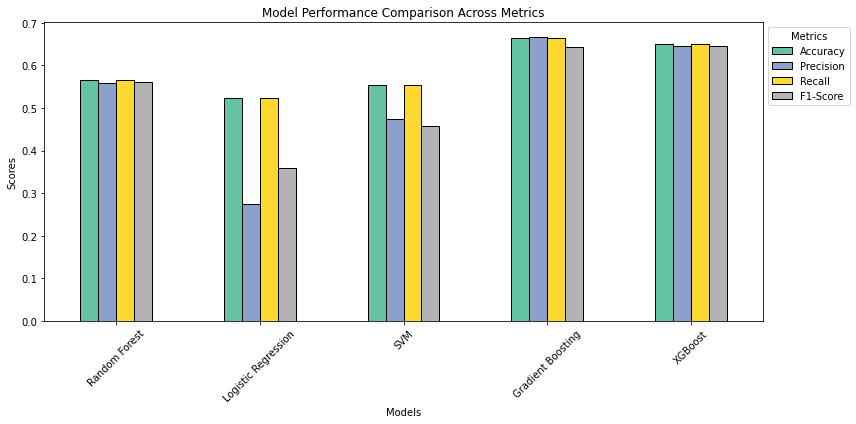

In [23]:
import matplotlib.pyplot as plt

# Display the results in a graph
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2', edgecolor='black')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison Across Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

In [9]:
# Gradient Boosting and XGBoost gives the best metrics

# Unsupervised Models

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Select the relevant columns
X = data_cleaned_no_outliers[['Hazardous Waste for Treatment (tons)', 
                              'Non-Hazardous Waste for Treatment (tons)', 
                              'Hazardous Waste for Disposal (tons)', 
                              'Non-Hazardous Waste for Disposal (tons)', 
                              'Municipality', 
                              'Emission Pollutant']]

# Convert categorical columns to numeric (Label Encoding)
label_encoder = LabelEncoder()

# Convert each categorical column to a numeric column
X['Municipality'] = label_encoder.fit_transform(X['Municipality'])
X['Emission Pollutant'] = label_encoder.fit_transform(X['Emission Pollutant'])

# Data scaling (Standardization) on the numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-24-140531408d7f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Municipality'] = label_encoder.fit_transform(X['Municipality'])
<ipython-input-24-140531408d7f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Emission Pollutant'] = label_encoder.fit_transform(X['Emission Pollutant'])


# Performing Clustering with K-Means

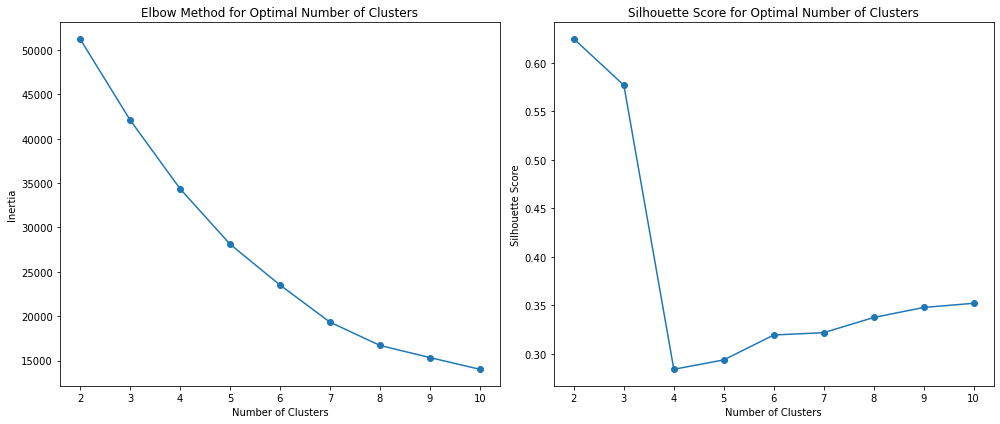

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculating Inertia and Silhouette Score for different numbers of groups
inertia = []
sil_scores = []
k_range = range(2, 11)  # We will examine a number of groups from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, cluster_labels))

# Elbow graph
plt.figure(figsize=(14, 6))

# Interia graph
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Score graph 
plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Elbow Method = According to this graph we see that the overall distance between the center of a point and another point begins to moderate around point 4 and this indicates to us that the optimal group size is 4
# Silhouette Score = The graph on the right shows us that in 4 groups the increase or decrease becomes less sharp, so we chose 4 groups

# Conclusion: Both indicators indicate that the optimal number of groups is 4

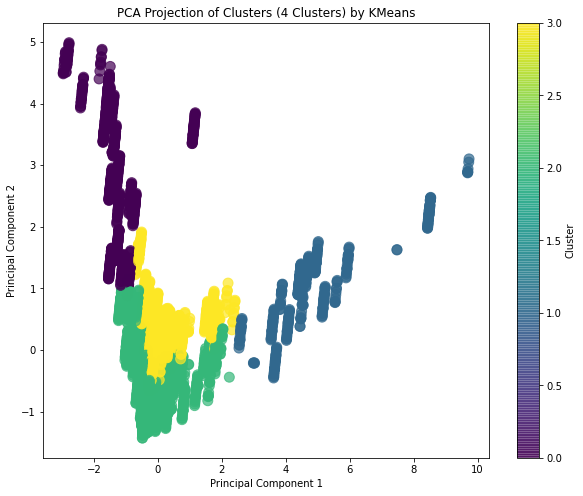

In [46]:
from sklearn.decomposition import PCA

# Grouping with 4 groups (the optimal number according to Elbow Method and Silhouette Score)
kmeans = KMeans(n_clusters=4, random_state=42)
data_cleaned_no_outliers['Cluster_k'] = kmeans.fit_predict(X_scaled)

# Perform PCA to reduce dimensionality and create a 2D graph
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the groups on a scatter graph with the scaled data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_cleaned_no_outliers['Cluster_k'], cmap='viridis', s=100, alpha=0.7)
plt.title('PCA Projection of Clusters (4 Clusters) by KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## We see that the green and yellow groups were formed with a higher density, which indicates a strong group, the distances between points are smaller than in purple and blue
## We see that between the yellow and the green there is some similarity because the points touch each other
# We wanted to check how the various factories are characterized when we examined the city and type of material columns regarding the hazardous/non-hazardous materials that are treated/disposed of, and we indeed found that there is a characterization.

In [41]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
label_encoder = LabelEncoder()
data_cleaned_no_outliers['Municipality'] = label_encoder.fit_transform(data_cleaned_no_outliers['Municipality'])
data_cleaned_no_outliers['Emission Pollutant'] = label_encoder.fit_transform(data_cleaned_no_outliers['Emission Pollutant'])

# Add the 'Cluster' category to the data
data_cleaned_no_outliers['Cluster_k'] = kmeans.labels_

# Set of features we want to test
columns_to_check = ['Hazardous Waste for Treatment (tons)', 
                    'Non-Hazardous Waste for Treatment (tons)', 
                    'Hazardous Waste for Disposal (tons)', 
                    'Non-Hazardous Waste for Disposal (tons)', 
                    'Municipality', 
                    'Emission Pollutant']

# Calculate averages by groups
grouped_data = data_cleaned_no_outliers.groupby('Cluster_k')[columns_to_check].mean()

# Calculate percentages for each group
grouped_data_percentage = grouped_data.divide(grouped_data.sum(axis=1), axis=0) * 100


print("\nPercentage for each Cluster:")
print(grouped_data_percentage)

# Showing how many percentages each column takes from each group


Percentage for each Cluster:
           Hazardous Waste for Treatment (tons)  \
Cluster_k                                         
0                                     10.071404   
1                                      0.001076   
2                                      0.976568   
3                                      0.502379   

           Non-Hazardous Waste for Treatment (tons)  \
Cluster_k                                             
0                                         41.998433   
1                                         49.681461   
2                                         55.669995   
3                                         56.555637   

           Hazardous Waste for Disposal (tons)  \
Cluster_k                                        
0                                    37.091758   
1                                     0.000000   
2                                     2.489829   
3                                     1.320984   

           Non-Hazardous Waste 

# Create a heatmap of the averages for each group

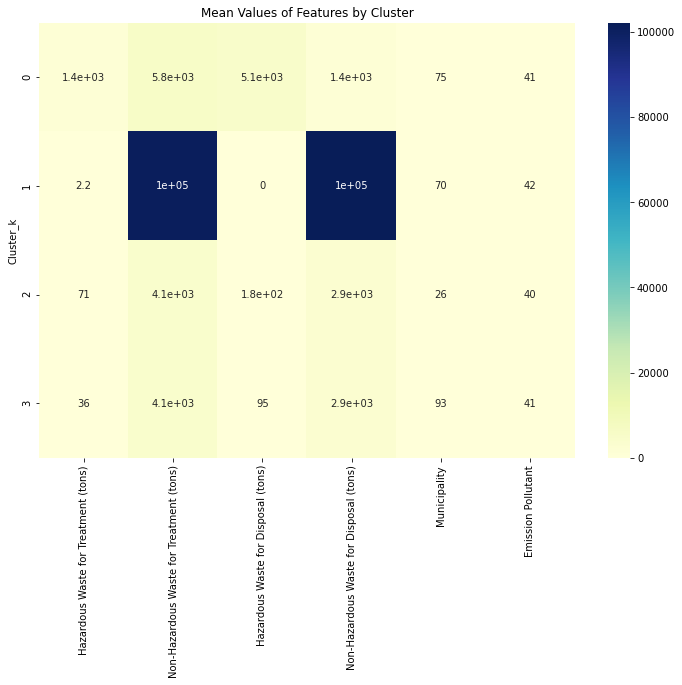

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Mean Values of Features by Cluster')
plt.show()

# Illustrating which columns belong to a certain group more than another group

# DBSCAN

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Select the desired columns
columns_to_use = ['Hazardous Waste for Treatment (tons)', 
                    'Non-Hazardous Waste for Treatment (tons)', 
                    'Hazardous Waste for Disposal (tons)', 
                    'Non-Hazardous Waste for Disposal (tons)', 
                    'Municipality', 
                    'Emission Pollutant']

# Take only the relevant data
X = data_cleaned_no_outliers[columns_to_use]

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# We want to show how certain factories are characterized

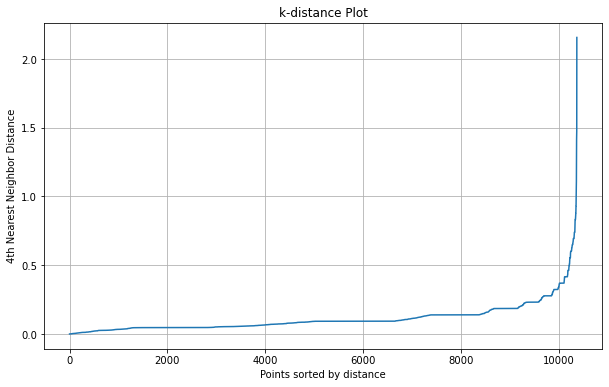

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Calculate the distances of each point to the nearest point
neigh = NearestNeighbors(n_neighbors=4)  # Use 4 because DBSCAN requires at least 4 points around
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Determine the 4th closest distance
distances = np.sort(distances[:, 3], axis=0)

# K-Distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("k-distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

# The largest jump in the graph is seen in the area of 0.5, so eps=0.5 is chosen

# Silhouette Score

In [74]:
from sklearn.metrics import silhouette_score

min_samples_range = [2,3,4, 5,6, 8,12]
sil_scores = {}

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X_scaled)
    sil_scores[min_samples] = silhouette_score(X_scaled, cluster_labels)

print("Silhouette Scores for different min_samples:")
for min_samples, score in sil_scores.items():
    print(f"min_samples={min_samples}: Silhouette Score = {score:.4f}")

Silhouette Scores for different min_samples:
min_samples=2: Silhouette Score = -0.1816
min_samples=3: Silhouette Score = -0.1462
min_samples=4: Silhouette Score = -0.1467
min_samples=5: Silhouette Score = -0.1567
min_samples=6: Silhouette Score = -0.1487
min_samples=8: Silhouette Score = -0.1589
min_samples=12: Silhouette Score = -0.2589


# When this indexs is less than 0, then the groups that created are not good enough nothing can be concluded from them.

In [75]:
# Grouping using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  
data_cleaned_no_outliers['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

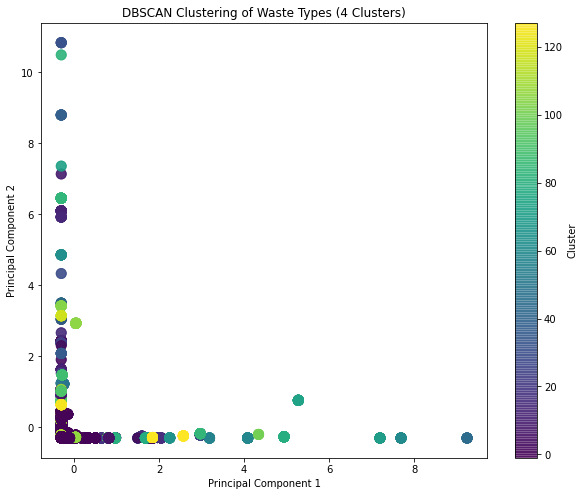

In [76]:
# Displaying the groups on a scatter graph
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_cleaned_no_outliers['Cluster_DBSCAN'], cmap='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering of Waste Types (4 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## As we discussed in the lesson that will happen, we see that the classification did not come out properly because there is not a high enough dispersion in each group
## We searched a lot of columns to see if there is indeed a classification, but we did not find it.